# **Projekt 1 - Raport**
---
Zuzanna Stachura, nr. indeksu 405235

# Zadanie 1 



**Seaborn** to biblioteka pozwalająca na szybkie tworzenie wykresów w Python. Została zbudowana na bazie biblioteki Matplotlib jednocześnie wzbogaconej o dodatkowe typy wykresów. Najczęściej stosowane typy wykresów to: 
*   Wykresy relacyjne
*   Wykresy z kategoriami
*  Wykresy z regresją
*   Wykresy dystrybucji oraz korelacji

# Zadanie 2

**Dane.gov.pl** to portal, który oferuje bezpłatny, nie wymagający rejestracji dostęp do informacji publicznej z różnych kategorii, takich jak np. sport, środowisko, budżet i finanse. Większość danych udostępnianych jest w otwartych formatach umożliwiających ich maszynowy odczyt, a niektóre – przez interfejs programistyczny API. </br> API, czyli interfejs programistyczny aplikacji, to zestaw reguł opisujący, w jaki sposób komunikują się ze sobą programy. API do wybranych danych udostępniane są bezpłatnie na portalu dane.gov.pl. Obecnie na portalu znajduje się ponad 500 ich rodzajów. Dane portalu można ponownie wykorzystywać np. do tworzenia aplikacji bez konieczności składania wniosku. Jakość danych w portalu zależy od ich odpowiedniego przygotowania przez dostawców. W szybki sposób można sprawdzić kto jest dostawcą danych - tym samym sprawdzić ich wiarygodność oraz format danych.

# Zadanie 3

Zestaw danych, który wybrano to ***Wyniki pomiarów dot. monitoringu chemizmu gleb ornych Polski w 2020 roku***. 
</br> Jest on dostępny pod adresem https://dane.gov.pl/pl/dataset/778,panstwowy-monitoring-srodowiska-monitoring-chemizmu-gleb-ornych-polski/resource/43362/table?page=1&per_page=20&q=&sort=

# Zadanie 4
### Wykonanie pierwszych etapów pipeline’u ML

### 1. Pobranie danych i zapoznanie się z ich opisem

- Import potrzebnych bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
from shapely.geometry import Point, Polygon

- Wczytanie i wyświetlenie danych

In [2]:
df = pd.read_excel('dane.xls',sheet_name='Dane pomiarowe', index_col=0)
df.head()

,Numer Punktu,Województwo,Gmina,Powiat,Szerokość geograficzna,Długość geograficzna,Współrzędna WGS X,Współrzędna WGS Y,"piasek (1-0,1 mm) (%)","pył (0,1-0,02 mm) (%)",...,Zn (mg/kg),Co (mg/kg),V (mg/kg),Li (mg/kg),Be (mg/kg),Ba (mg/kg),Sr (mg/kg),La (mg/kg),As (mg/kg),Hg (mg/kg)
Lp.,,,,,,,,,,,,,,,,,,,,,
1,1,zachodniopomorskie,Siemyśl,Powiat kołobrzeski,"54° 4' 10""","15° 26' 58""",54.069444,15.449444,67,20,...,21,1.45,8.69,,,14.8,,5.33,1.72,
2,3,zachodniopomorskie,Karlino,Powiat białogardzki,"54° 2' 59""","15° 54' 0""",54.049722,15.900000,61,30,...,29.7,1.6,9.01,,,22.9,,6.32,2.35,
3,5,zachodniopomorskie,M. Koszalin,Powiat m. Koszalin,"54° 12' 21""","16° 8' 44""",54.205833,16.145556,45,31,...,41.9,6.38,24.60,11.4,,42.3,,15.6,5.17,
4,7,zachodniopomorskie,Postomino,Powiat sławieński,"54° 27' 57""","16° 44' 1""",54.465833,16.733611,38,35,...,31.2,3.55,20.60,,,27.1,,9.9,3.64,
5,9,pomorskie,Trzebielino,Powiat bytowski,"54° 15' 38""","17° 6' 3""",54.260556,17.100833,65,24,...,22.1,1.46,10.00,,,10.5,,6.18,2.46,


- Wyświetlenie informacji o danych

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1 to 216
Data columns (total 81 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Numer Punktu                        216 non-null    int64  
 1   Województwo                         216 non-null    object 
 2   Gmina                               216 non-null    object 
 3   Powiat                              216 non-null    object 
 4   Szerokość geograficzna              216 non-null    object 
 5   Długość geograficzna                216 non-null    object 
 6   Współrzędna WGS X                   216 non-null    float64
 7   Współrzędna WGS Y                   216 non-null    float64
 8   piasek (1-0,1 mm) (%)               216 non-null    int64  
 9   pył (0,1-0,02 mm) (%)               216 non-null    int64  
 10  części spławialne (< 0,02 mm) (%)   216 non-null    int64  
 11  ił koloidalny (< 0,002 mm) (%)      216 non-n

Dane zawierają wyniki pomiarów zebrane z 216 punktów pomiarowych zlokalizowanych na terenie Polski dotyczące monitoringu chemizmu gleb ornych. Z każdego punktu zebrano próbki gleby, które poddano badaniom labolatoryjnym i uzyskano informacje m.in o 
> - składzie granulometrycznym - `kolumny 8-14`
> - odczynie - kolumny `pH H2`O i `pH KCl`
> - węglanach - kolumna `CaCO3 (%)`
> - substancjach organicznych - kolumna `próchnica (%) `
> - właściwościach sorpcyjnych - kolumny `Hh (cmol/kg)` (kwasowość hydrolityczna) i `Hw (cmol/kg)` (kwasowość wymienna) oraz `kolumny 16-22`
> - zawartości pierwiastków przyswajalnych dla roślin - `kolumny 29-32`
> - całkowitej zawartości makroelementów - `kolumny 56 i 58-64`
> - całkowitej zawartości pierwiastków śladowych - `kolumny 65-80`
> - wielopierścieniowych weglowodorach aromatycznych - `kolumny 38-55`
> - zasoleniu - kolumna `zasolenie (mg KCl/100g)`   
> - radioaktywności - kolumna ` radioaktywność (Bq/kg) `

Warto zwrócić uwagę na fakt, że niewiadomo czy puste komórki występują w przypadku braku pomiaru czy pomiaru równego 0 (dlatego niektóre kolumny mają wartość 'object' a nie 'float64'). Nie ma wpisanych typowo wartości 'NaN'. Na potrzeby analizy można założyć, że puste miejsca oznaczają wyniki pomiarów równe 0.


### 2. Użycie danych

Dane mogą zostać użyte do przewidywania poziomu zanieczyszczenia gleb ornych na terenie Polski. W tym wypadku uczenie nadzorowane będzie polegać na prognozowaniu zanieczyszczenie gleby czyli np. poziomu ilości sumy związków, które należą do Wielopierścieniowych weglowodorów aromatycznych (WWA) i znajdują się w glebie, według położenia geograficznego, składu granulometrycznego czy właściwości sorpcyjnych.

### 3. FE - Feautre Engineering

Pierwszym elementem istotnym do dalszej analizy jest sprawdzenie ile występuje wartości brakujących. Zbior należy zmodyfikować - zastąpić puste miejsca wartościami 0. Nie są to typowo wartości, których brakuje, tylko reprezentują one wartość pomiaru np dla danego pierwiastka równą 0. Następnie sprawdzono czy typowe wartości 'NaN' występują. Wyświetlono  procent brakujących wartości w poszczególnych kolumnach.

In [18]:
df = df[:].replace(' ',0)
srednia =df.isnull().mean().to_frame()
srednia.columns = ['Procent brakujących danych [%] ']
srednia = srednia.T*100
sredniaPrint = srednia.style.format(precision=2)
sredniaPrint

,Numer Punktu,Województwo,Gmina,Powiat,Szerokość geograficzna,Długość geograficzna,Współrzędna WGS X,Współrzędna WGS Y,"piasek (1-0,1 mm) (%)","pył (0,1-0,02 mm) (%)","części spławialne (< 0,02 mm) (%)","ił koloidalny (< 0,002 mm) (%)","piasek (2-0,05 mm) (%)","pył (0,05-0,002 mm) (%)","części spławialne (< 0,002 mm) (%)",Hh (cmol/kg),Mg (cmol/kg),Na (cmol/kg),T (cmol/kg),Ca (cmol/kg),K (cmol/kg),S (cmol/kg),V (cmol/kg),próchnica (%),CaCO3 (%),pH H2O,pH KCl,Hw (cmol/kg),Alw (cmol/kg),P2O5 (mg 100g),K2O (mg 100g),Mg (mg 100g),S-SO4 (mg 100g),Corg (%),C:N,radioaktywność (Bq/kg),przewodność (mS/m),zasolenie (mg KCl/100g),naftalen (µg/kg),fenantren (µg/kg),antracen (µg/kg),fluoranten (µg/kg),chryzen (µg/kg),benzo(a)antracen (µg/kg),benzo(a)piren (µg/kg),benzo(a)fluoranten (µg/kg),benzo(ghi)perylen (µg/kg),fluoren (µg/kg),piren (µg/kg),benzo(b)fluoranten (µg/kg),benzo(k)fluoranten (µg/kg),"dibenzo(a,h)antracen (µg/kg)","indeno(1,2,3-cd)piren (µg/kg)","benzo(g,h,i)perylen (µg/kg)",suma WWA-9 (µg/kg),suma WWA-13 (µg/kg),S (%),Nogol (%),Ca (%),Mg (%),K (%),Na (%),Al (%),Fe (%),P (%),Mn (mg/kg),Cd (mg/kg),Cu (mg/kg),Cr (mg/kg),Ni (mg/kg),Pb (mg/kg),Zn (mg/kg),Co (mg/kg),V (mg/kg),Li (mg/kg),Be (mg/kg),Ba (mg/kg),Sr (mg/kg),La (mg/kg),As (mg/kg),Hg (mg/kg)
Procent brakujących danych [%],0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Można zauważyć, że dane nie zawierają 'NaN'ów .Nie trzeba więc modyfikować zbioru danych, usuwając takie wartości lub zastępując je medianą czy średnią.

Kolejnym krokiem jest sprawdzenie liczebności poszczególnych etykiet dla danych zmiennych 
jakościowych

In [6]:
dfNew = df.copy()
print(f'Ilość danych ogółem: {len(dfNew)}')
cols = ["Numer Punktu","Województwo","Gmina","Powiat","Szerokość geograficzna","Długość geograficzna","Współrzędna WGS X","Współrzędna WGS Y"]
for col in cols:
    print(f'Liczba etykiet zmiennej "{col}": {len(dfNew[col].unique())}')

Ilość danych ogółem: 216
Liczba etykiet zmiennej "Numer Punktu": 216
Liczba etykiet zmiennej "Województwo": 16
Liczba etykiet zmiennej "Gmina": 216
Liczba etykiet zmiennej "Powiat": 185
Liczba etykiet zmiennej "Szerokość geograficzna": 213
Liczba etykiet zmiennej "Długość geograficzna": 216
Liczba etykiet zmiennej "Współrzędna WGS X": 213
Liczba etykiet zmiennej "Współrzędna WGS Y": 216


Można zauważyć, że poza kolumną `Województwo`, zmienne jakościowe mają dużą kardynalność - występuje wiele unikalnych wartości. Zmienne `Szerokość geograficzna` oraz `Długość geograficzna` są powiązane z kolumnami `Współrzędna WGS X` oraz `Współrzędna WGS Y` - do dalszej analizy zostaną wzięte pod uwagę te dwie ostatnie. Mogą mieć one istotne znaczenie dla przyszłego modelu, gdyż można z nich wydobyć informację o położeniu danych punktów pomiarowych. Można zredukować liczbę etykiet w tych kolumnach poprzez użycie zakresów współrzędnych do jakich należą np. zamiast współrzędnej X: 53.711667 zastosować:53-53.5

In [7]:
dfNew2 = dfNew.copy()

bins = pd.IntervalIndex.from_tuples([(49, 49.5), (49.5, 50), (50, 50.5), (50.5, 51), (51, 51.5), (51.5,52),(52,52.5),(52.5,53),(53,53.5),(53.5,54),(54,54.5),(54.5,55)], closed='left')
a = ['<49, 49.5)', '<49.5, 50)', '<50, 50.5)', '<50.5, 51)', '<51, 51.5)', '<51.5,52)','<52,52.5)','<52.5,53)','<53,53.5)','<53.5,54)','<54,54.5)','<54.5,55)']
dfNew2['Współrzędna WGS X - zakres'] = np.array(a)[pd.cut(dfNew2['Współrzędna WGS X'], bins = bins).cat.codes]

bins2 = pd.IntervalIndex.from_tuples([(15, 15.5), (15.5, 16), (16, 16.5), (16.5, 17), (17, 17.5), (17.5,18),(18,18.5),(18.5,19),(19,19.5),(19.5,20),(20,20.5),(20.5,21),(21,21.5),(21.5,22),(22,22.5),(22.5,23),(23,23.5),(23.5,24),(24,24.5),(24.5,25)], closed='left')
a2 = ["<15, 15.5)", "<15.5, 16)", "<16, 16.5)", "<16.5, 17)", "<17, 17.5)", "<17.5,18)","<18,18.5)","<18.5,19)","<19,19.5)","<19.5,20)","<20,20.5)","<20.5,21)","<21,21.5)","<21.5,22)","<22,22.5)","<22.5,23)","<23,23.5)","<23.5,24)","<24,24.5)","<24.5,25)"]
dfNew2['Współrzędna WGS Y - zakres'] = np.array(a2)[pd.cut(dfNew2['Współrzędna WGS Y'], bins = bins2).cat.codes]



cols = ['Współrzędna WGS X - zakres','Współrzędna WGS Y - zakres']

for col in cols:
    print(f'Liczba etykiet zmiennej "{col}": {len(dfNew2[col].unique())}')


Liczba etykiet zmiennej "Współrzędna WGS X - zakres": 12
Liczba etykiet zmiennej "Współrzędna WGS Y - zakres": 20


- Wykonanie kodowania zmiennych kategorycznych do zmiennych liczbowych

Postanowiono zamienić zmienne kategoryczne (zakresy współrzędnych X i Y) zmiennymi liczbowymi. W tym celu stworzono słownik zawierające liczby odpowiadające wybranym zakresom.

In [24]:
enum = enumerate(dfNew2['Współrzędna WGS X - zakres'].unique())
zakresX = dict((j,i) for i,j in enum)
enum = enumerate(dfNew2['Współrzędna WGS Y - zakres'].unique())
zakresY = dict((j,i) for i,j in enum)

- Zastąpienie etykiet zmiennych słownikiem

Etykiety zastąpiono wcześniej stworzonym słownikiem a następnie wyświetlono wyniki.

In [29]:
dfNew2['Współrzędna WGS X - zakres,liczba'] = dfNew2['Współrzędna WGS X - zakres'].map(zakresX)
dfNew2['Współrzędna WGS Y - zakres,liczba'] = dfNew2['Współrzędna WGS Y - zakres'].map(zakresY)
dfNew2[['Współrzędna WGS X - zakres','Współrzędna WGS X - zakres,liczba','Współrzędna WGS Y - zakres','Współrzędna WGS Y - zakres,liczba']]

,Współrzędna WGS X - zakres,"Współrzędna WGS X - zakres,liczba",Współrzędna WGS Y - zakres,"Współrzędna WGS Y - zakres,liczba"
Lp.,,,,
1,"<54,54.5)",0,"<15, 15.5)",0
2,"<54,54.5)",0,"<15.5, 16)",1
3,"<54,54.5)",0,"<16, 16.5)",2
4,"<54,54.5)",0,"<16.5, 17)",3
5,"<54,54.5)",0,"<17, 17.5)",4
...,...,...,...,...
212,"<49.5, 50)",10,"<21.5,22)",12
213,"<49.5, 50)",10,"<21.5,22)",12
214,"<50, 50.5)",9,"<22,22.5)",16


Następnie obliczono procent zredukowanych danych.

In [30]:
bef = len(dfNew['Współrzędna WGS X'].unique())
aft = len(dfNew2['Współrzędna WGS X - zakres,liczba'].unique())
reduc = (bef-aft)/bef*100
print(f'W przypadku zmiennej "Współrzędna WGS X" zredukowano liczbę etykiet o {round(reduc, 2)}%')

bef = len(dfNew['Współrzędna WGS Y'].unique())
aft = len(dfNew2['Współrzędna WGS Y - zakres,liczba'].unique())
reduc = (bef-aft)/bef*100
print(f'W przypadku zmiennej "Współrzędna WGS Y" zredukowano liczbę etykiet o {round(reduc, 2)}%')


W przypadku zmiennej "Współrzędna WGS X" zredukowano liczbę etykiet o 94.37%
W przypadku zmiennej "Współrzędna WGS Y" zredukowano liczbę etykiet o 90.74%


Dzięki użyciu jedynie zakresów do jakich należą współrzędne, udało się zredukować liczbę unikatowych etykiet o około 94% w przypadku zmiennej `Współrzędna WGS X` oraz o około 91% w przypadku zmiennej `Współrzędna WGS Y`

### 4. EDA - Exploratory Data Analysis

Aby lepiej zwizualizwoać i poznać dane, przeprowadzono Eskploracyjną Analizę Danych.
</br> Na początek stworzono wykres z rozmieszczeniem punktów pomiarowych na terenie Polski. Dla lepszego zobrazowania wyników, dodano mapę Polski wraz z wyszczególnionymi województwami. Mapę wzięto z zajęć Analizy Danych Przestrzennych.

- Wczytanie pliku z mapą Polski w postaci GeoDataFrame

In [9]:
woj = gpd.read_file("Wojewodztwa.zip")
woj = gpd.GeoDataFrame({'Nazwa':woj['JPT_NAZWA_'], 'geometry':woj['geometry']})

- Wizualizacja 

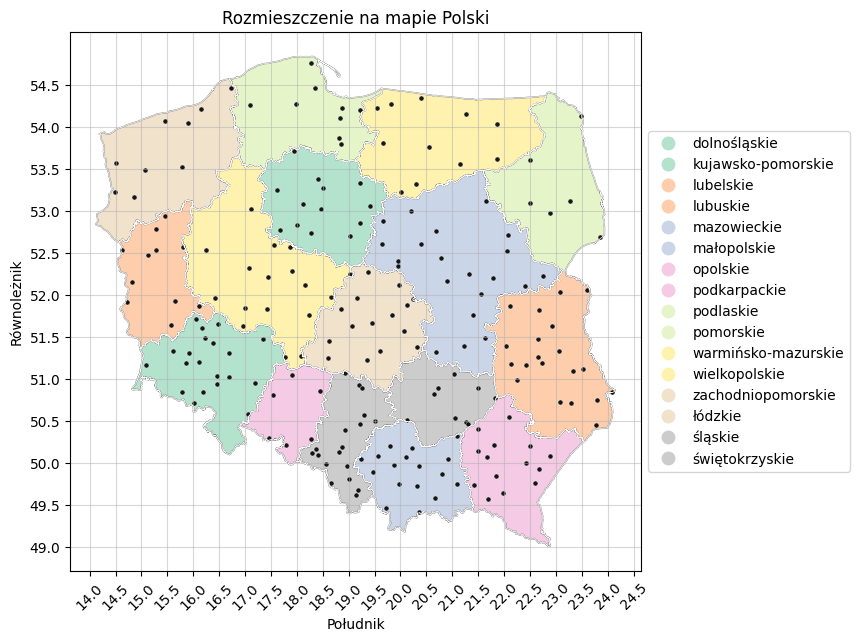

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
woj.plot( edgecolor="grey", ax=ax,column='Nazwa',legend=True, alpha=1,cmap='Pastel2',legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
woj.boundary.plot(color='white', ax =ax,linewidth=0.5)
sns.scatterplot(dfNew2, x='Współrzędna WGS Y', y='Współrzędna WGS X', ax=ax, s=13, color='black', alpha=0.9)
ax.set(title='Rozmieszczenie na mapie Polski', xlabel='Południk', ylabel="Równoleżnik")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(round(start), round(end), 0.5))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(round(start), round(end), 0.5))
plt.xticks(fontsize=10, rotation=45)
plt.grid(alpha=0.5)
plt.show()


Na powyższym wykresie można zauważyć, że punkty pomiarowe rozmieszczone są stosunkowo równomiernie. Wyjątkiem są niektóre punkty w województwie śląskim  - są one gęsto usytuowane w poszczególnych miejsach. Powodem może być różnorodność ze względu na rodzaje gleb w tamtych rejonach, z tego względu postanowiono zebrać próbki niedaleko od siebie.
</br> Potwierdzeniem tego jest poniższy wykres, który przedstawia ilość punktów pomiarowych w poszczególnych województwach. Można zauważyć, że w województwie śląskim zebrano jedną z największych ilości próbek gleby.

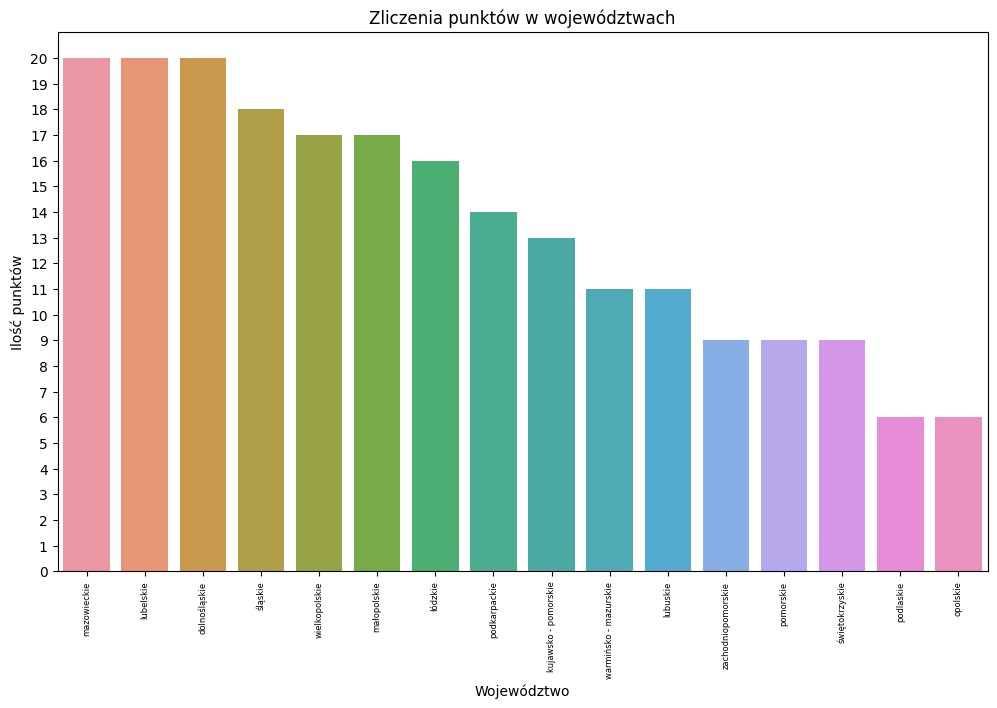

In [11]:
countPoints = dfNew['Województwo'].value_counts().to_frame()
countPoints = countPoints.reset_index()
countPoints.columns = ['Woj','count']
fig,ax =  plt.subplots(figsize=(12, 7))
# dfNew['Województwo'].value_counts().plot.bar()
sns.barplot(data=countPoints,x="Woj",y='count')
plt.xticks(fontsize=6, rotation=90)
ax.set(title='Zliczenia punktów w województwach', xlabel='Województwo', ylabel="Ilość punktów")
plt.yticks(np.arange(0, max(countPoints['count'])+1, 1.0))
plt.show()

- Rozkłady cech numerycznych

Kolejnym krokiem w EDA jest wizualizacja rozkładów dla cech numerycznych. Na początek wzięto pod uwagę kolumny zawierające informacje o wielopierścieniowych weglowodorach aromatycznych - kolumny `naftalen`,`fenantren (µg/kg)`, `antracen (µg/kg)`,`fluoranten (µg/kg)`,`chryzen (µg/kg)`,`benzo(a)antracen`,`benzo(a)piren (µg/kg)`, `benzo(a)fluoranten (µg/kg)`,`piren (µg/kg)` , `benzo(b)fluoranten (µg/kg)`, `benzo(k)fluoranten (µg/kg)`,`indeno(1,2,3-cd)piren (µg/kg)`,`benzo(g,h,i)perylen (µg/kg)`. Są one z grup trwałych zanieczyszczeń organicznych, z których część wykazuje silne właściwości toksyczne, mutagenne i rakotwórcze. Występują we wszystkich elementach środowiska, co związane jest z ich powstawaniem w procesach niecałkowitego spalania substancji organicznych.
</br> Postanowiono przedstawić ich rozkłady za pomocą histplotów.

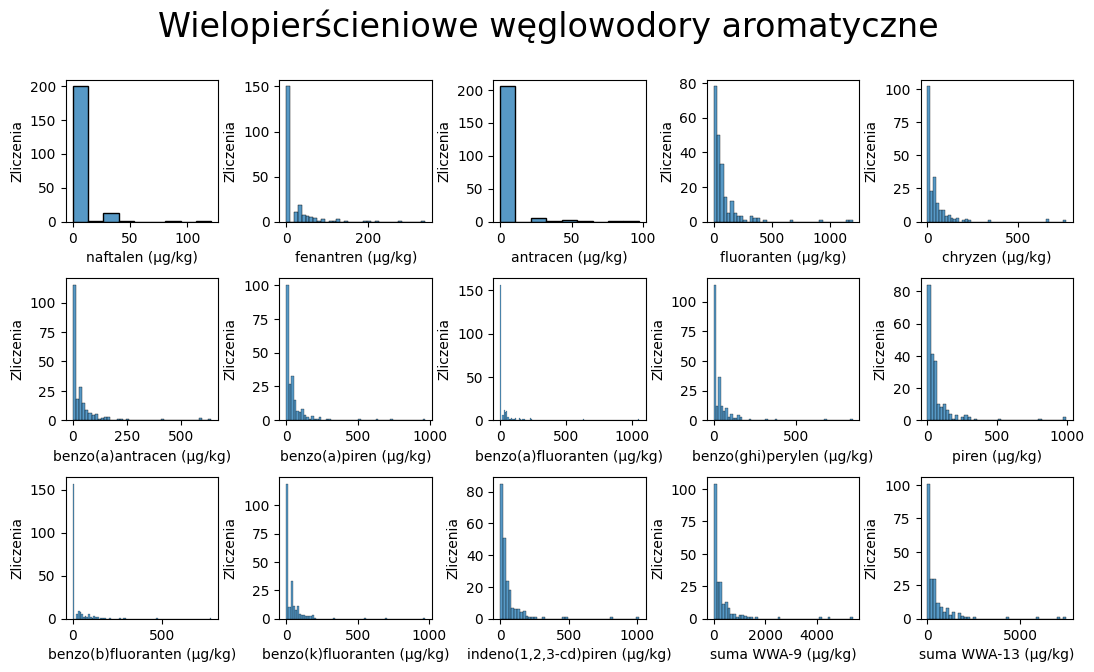

In [12]:
fig, axes = plt.subplots(3, 5, figsize=(13, 7))
cols = ['naftalen (µg/kg)','fenantren (µg/kg)', 'antracen (µg/kg)','fluoranten (µg/kg)','chryzen (µg/kg)']
cols2 =['benzo(a)antracen (µg/kg)','benzo(a)piren (µg/kg)', 'benzo(a)fluoranten (µg/kg)','benzo(ghi)perylen (µg/kg)','piren (µg/kg)' ]
cols3 = ['benzo(b)fluoranten (µg/kg)','benzo(k)fluoranten (µg/kg)','indeno(1,2,3-cd)piren (µg/kg)','suma WWA-9 (µg/kg)','suma WWA-13 (µg/kg)']

for i, col in enumerate(cols):
    sns.histplot(data = dfNew2[col], ax=axes[0, i])
    axes[0, i].set(ylabel='Zliczenia')
for i, col in enumerate(cols2):
    sns.histplot(data = dfNew2[col], ax=axes[1, i])
    axes[1, i].set(ylabel='Zliczenia')
for i, col in enumerate(cols3):
    sns.histplot(data = dfNew2[col], ax=axes[2, i])
    axes[2, i].set(ylabel='Zliczenia')


fig.suptitle('Wielopierścieniowe węglowodory aromatyczne ', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Analizując powyższe wykresy można zauważyć, że rozkłady we wszystkich przypadkach są prawostronnie skośne. W danych występują wartości odstające, których prawdopodobnie należałoby usunąć. Szcególnie należy zwrócić uwagę na zmienne `suma WWA-9 (µg/kg)`,`suma WWA-13 (µg/kg)`. Wartości te są możliwe do uzyskania i niekoniecznie oznaczają błędy w pomiarach, ale mogą negatywnie wpłynąć na przyszły model.

Kolejnymi zmiennymi, które poddano wizualizacji, są kolumny oznaczające skład granulometryczny. Gatunek gleby, który wynika z jej składu granulometrycznego, ma istotne znaczenie dla wielu fizycznych i chemicznych właściwości gleb, w tym odczynu, naturalnej zawartości zanieczyszczeń w glebie oraz pojemności sorpcyjnej gleb, wpływającej bezpośrednio na procesy migracji zanieczyszczeń w środowisku. Reprezentacja gatunków gleb w punktach pomiarowo kontrolnych jest charakterystyczna dla pokrywy glebowej kraju. 
</br>Także postanowiono przedstawić rozkłady kolumn oznaczające skład granulometryczny za pomocą histplotów.

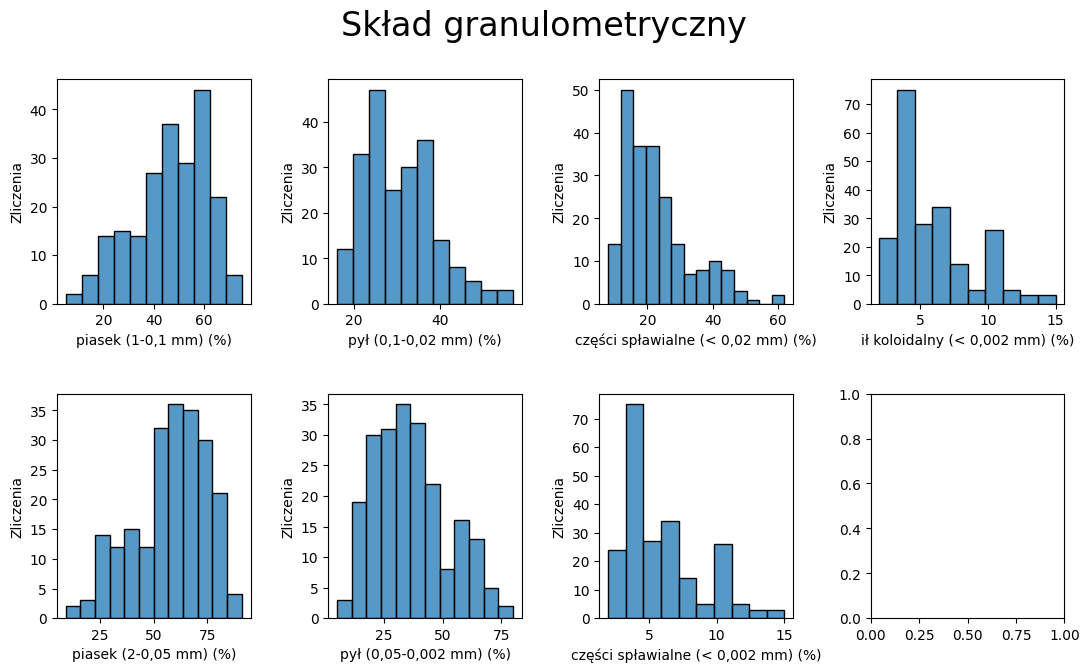

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(13, 7))
cols = ['piasek (1-0,1 mm) (%)','pył (0,1-0,02 mm) (%)','części spławialne (< 0,02 mm) (%)','ił koloidalny (< 0,002 mm) (%)']
cols2 = ['piasek (2-0,05 mm) (%)','pył (0,05-0,002 mm) (%)','części spławialne (< 0,002 mm) (%)']
for i, col in enumerate(cols):
    sns.histplot(data = dfNew2[col], ax=axes[0, i])
    axes[0, i].set(ylabel='Zliczenia')
for i, col in enumerate(cols2):
    sns.histplot(data = dfNew2[col], ax=axes[1, i])
    axes[1, i].set(ylabel='Zliczenia')
fig.suptitle('Skład granulometryczny', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Z powyższych wykresów wyciągnięto wnioski, że rozkłady w prawie wszystkich przypadkach są prawostronnie skośne poza zmiennymi `piasek (1-0,1 mm) (%)` i `piasek (2-0,05 mm) (%)`. W danych tych nie występują szczególne wartości odstające, których należałoby się pozbyć.

Ostatnimi zmiennymi, dla których postanowiono zwizualizować rozkłady, są zmienne oznaczające właściwości sorpcyjne gleby. Oznaczają one to, że gleba wykazuje duży potencjał do zatrzymywania oraz magazynowania składników mineralnych i organicznych, w tym zanieczyszczeń. Szczególnie istotną zmienną jest Pojemność sorpcyjna gleby (T).

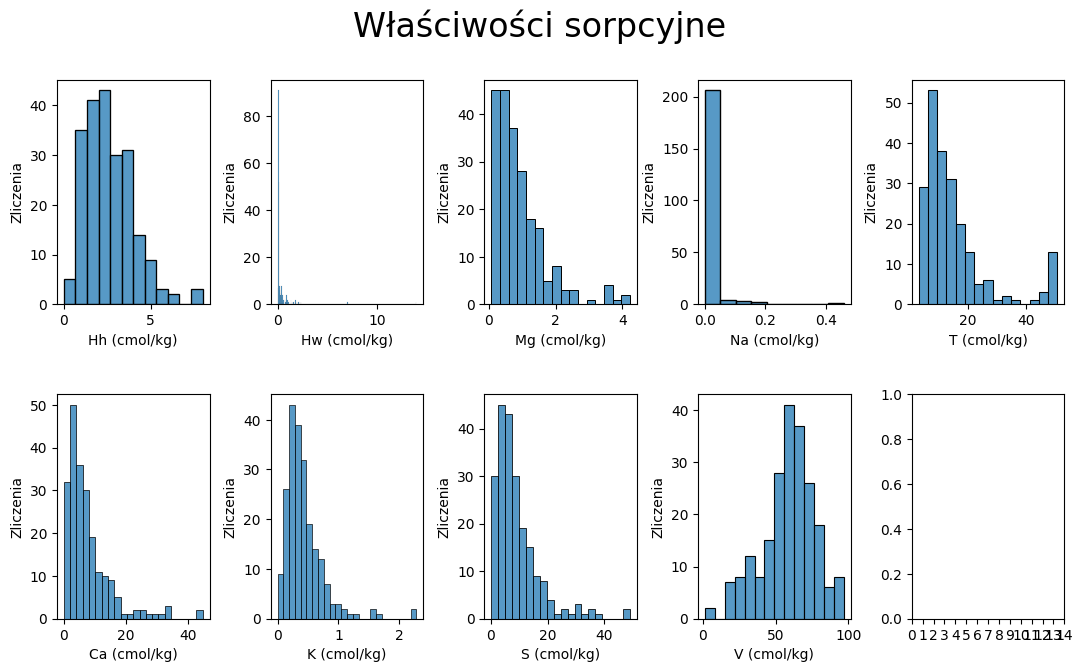

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(13, 7))
cols = ['Hh (cmol/kg)','Hw (cmol/kg)','Mg (cmol/kg)','Na (cmol/kg)','T (cmol/kg)']
cols2 = ['Ca (cmol/kg)','K (cmol/kg)','S (cmol/kg)','V (cmol/kg)']
for i, col in enumerate(cols):
    if i==1:        
        sns.histplot(data = dfNew2[col], ax=axes[0, i])
        plt.xticks(np.arange(0, max(dfNew2[col])+0.5, 1.0))
    else:
         sns.histplot(data = dfNew2[col], ax=axes[0, i])
    axes[0, i].set(ylabel='Zliczenia')
for i, col in enumerate(cols2):
    sns.histplot(data = dfNew2[col], ax=axes[1, i])
    axes[1, i].set(ylabel='Zliczenia')

fig.suptitle('Właściwości sorpcyjne ', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Analizując wykres rozkładu dla zmiennej `Hw (cmol/kg)` można zauważyć, że występują znaczące wartości odstające, które prawdopodobnie należałoby usunąć w celu uzyskania lepszego modelu. Rozkłady w prawie wszystkich przypadkach są prawostronnie skośne, jedynie dla `V(cmol/kg)` rozkład najbardziej przypomina normalny

- Usunięcie wartości odstających

W związku z powyższymmi wnioskami, postanowiono pozbyć się danych zawierających najbardziej ekstremalne wartości dla kolumn `suma WWA-9 (µg/kg)`,`suma WWA-13 (µg/kg)`,`Hw (cmol/kg)`. Jako ekstremalne uważa się wartości, znajdujące się poniżej 0.05 lub powyżej 0.95 percentyla. Wybrano te kolumny, ponieważ wizualnie zawierają najbardziej odbiegające wartości i będą one istotne w przyszłym modelu.

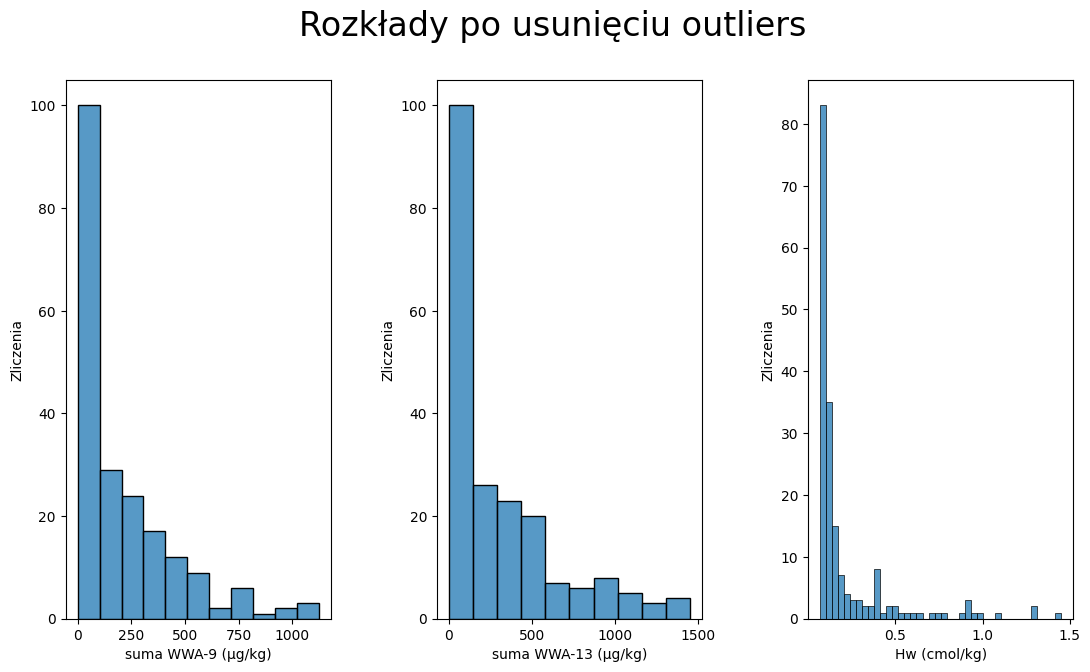

Ilość danych przed usunięciem ekstremalnych: 216 
Po usunięciu: 184
Zachowano:85.0% danych


In [17]:
fig, axes = plt.subplots(1, 3, figsize=(13, 7))
cols = ['suma WWA-9 (µg/kg)','suma WWA-13 (µg/kg)','Hw (cmol/kg)']
dfNew3 = dfNew2.copy()

for i, col in enumerate(cols):
    series = dfNew2[col]
    lower_percentile = 0.05
    higher_percentile = 0.95
    low, high = series.quantile([lower_percentile, higher_percentile])
    dfNew3.loc[dfNew3[col]<low,col] = -1
    dfNew3.loc[dfNew3[col]>high,col] = -1
    dfNew3.drop(dfNew3[dfNew3[col] == -1].index,inplace=True)
    
    sns.histplot(data = dfNew3[col], ax=axes[i])
    axes[i].set(ylabel='Zliczenia')



fig.suptitle('Rozkłady po usunięciu outliers', fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
print(f'Ilość danych przed usunięciem ekstremalnych: {len(dfNew2)} \nPo usunięciu: {len(dfNew3)}')
print(f'Zachowano:{np.round(len(dfNew3)/len(dfNew2),2)*100}% danych')

Po usunięciu wartości odstających, wyraźnie poprawiła się jakość rozkładów podanych cech numerycznych. Zachowano przy tym 85% danych, co jest wynikiem zadowalającym na potrzeby przyszłego modelu predykcyjnego.

### 5. Wybór kolumny TARGET

Jako kolumnę TARGET wybrano kolumnę `suma WWA-13 (µg/kg)`. Ocenę stopnia zanieczyszczenie gleb przez WWA oparto na klasyfikacji IUNG uwzględniającej sumę 13 związków z tej grupy. Zbyt wysoka zawartość niektórych WWA w glebach może wpływać negatywnie na organizmy glebowe, a tym samym prowadzić do zmian w bioróżnorodności i naruszać siedliskowe funkcje gleb. Rośliny uprawne mogą ulegać zanieczyszczeniu przez WWA zarówno w wyniku osadzania się tych związków wraz z pyłami na powierzchni liści oraz w mniejszym stopniu pobierać te związki z gleby. W niekorzystnych warunkach może to prowadzić to akumulacji WWA w łańcuchu pokarmowym człowieka wywierając wysoce niekorzystny wpływ na jego zdrowie.
</br> Prawidłowe przewidywanie tej sumy, pozwoliłoby na lepsze planowanie miejca zmieszkania ludzi.

### 6. Wybór podzbioru zmiennych FEATURES

Wybrano podzbiór zmiennych FEATURES jako:
- `Współrzędna WGS X - zakres,liczba` oraz  `Współrzędna WGS Y - zakres,liczba` - zmienne te mówią o położeniu geograficznym, które może mieć wpływ na poziom zanieczyszczenia gleb. Może być on zależny m.in od położenia od zbiorników wodnych lub od odległości od dużych miast, w których występuje wysoki poziom zanieczyszczenia powietrza
- `piasek (1-0,1 mm) (%)`,`pył (0,1-0,02 mm) (%)`,`części spławialne (< 0,02 mm) (%)`,`ił koloidalny (< 0,002 mm) (%)`,`piasek (2-0,05 mm) (%)`,`pył (0,05-0,002 mm) (%)`,`części spławialne (< 0,002 mm) (%)` - zmienne te mówią o składzie granulometrycznym gleby, a gatunek gleby, który wynika z jej składu granulometrycznego, ma istotne znaczenie dla naturalnej zawartości zanieczyszczeń w glebie oraz pojemności sorpcyjnej gleb, która może mieć wpływ na pochłanianie zanieczyszczeń z otoczenia
- `Hw (cmol/kg)` czyli kwasowość hydrolityczna - należy do właściwości sorpcyjnych gleby,parametr ten stanowi miarę wysycenia kompleksu sorpcyjnego gleb wodorem i obejmuje całkowitą kwasowość gleby
- oraz `T (cmol/kg)` czyli pojemność sorpcyjna gleby -  wpływającej bezpośrednio na procesy migracji zanieczyszczeń w środowisku.